In [1]:
# -*- coding: utf-8 -*-
"""
Created on May 27, 2024
Last modified on May 27, 2024
@Author: Guan-Fu Liu

To test the read_results.py
"""
from read_results import *
from matplotlib.gridspec import GridSpec
%matplotlib widget

In [2]:
# file_path = "./outputs/ChemEvo_galIMF_set.h5"
file_path = "./outputs/ChemEvo_N13.h5"
yield_files, groups, ElemNotice, dfs, ElemIntersect, SNIaOn, mass_lifeAge_file, mass_lifeAge, SFH, StarInitElement,\
             StellarMass, SNccNum, SNIaNum, AGB_Num, GasElement, ZGas, EjectElement, SNccElement, SNIaElement,\
             AGB_Element, YieldsTable, IMF_type, IMF_data, creation_Age, SFE, \
             interp_kind, comments, solar_set = read_results(file_path)

The elements you notice but not available in the yield table of SNIa, Z_0_02 are
 {'H', 'He'}
The yields from SNIa are taken into consideration in the result to be analysed.
The evolution of the IMF is saved in the file ./outputs/imf_evolve.py
Please import it by yourself.


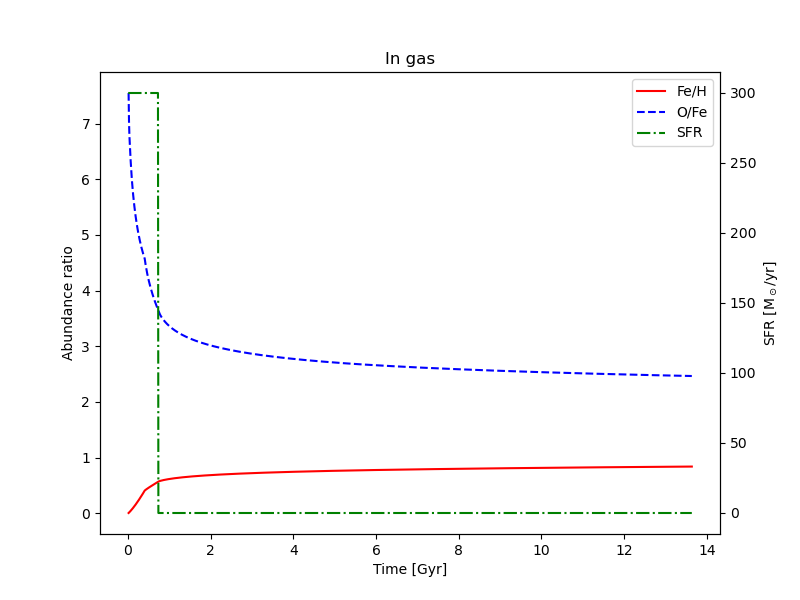

In [3]:
Zi2Zj = { }
Zi2Zj.update(GetZi2Zj(GasElement, "Fe", "H", solar_set, fill_value=None))
Zi2Zj.update(GetZi2Zj(GasElement, "O", "Fe", solar_set, fill_value=None))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
line1, = ax.plot(SFH['Age'][Zi2Zj['Fe/H-mask']]/1e9, Zi2Zj['Fe/H'], 'r-')
line2, = ax.plot(SFH['Age'][Zi2Zj['O/Fe-mask']]/1e9, Zi2Zj['O/Fe'], 'b--')
ax1 = ax.twinx()
line3, = ax1.plot(SFH['Age']/1e9, SFH['SFR'], 'g-.')
ax1.set_ylabel(r'SFR [M$_\odot$/yr]')
ax.legend([line1, line2, line3], ['Fe/H', 'O/Fe', 'SFR'])
ax.set_xlabel('Time [Gyr]')
ax.set_ylabel('Abundance ratio')
ax.set_title("In gas")
plt.show()